# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

D:\Programs\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

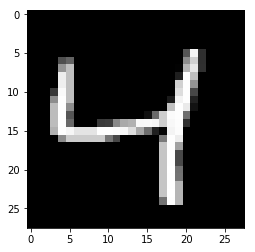

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [19]:
# Size of the encoding layer (the hidden layer)
encoding_dim_1 = 32 # feel free to change this value
encoding_dim = 64 # feel free to change this value

image_size = mnist.train.images.shape[1]

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, (None, image_size), name="input")
targets_ = tf.placeholder(tf.float32, (None, image_size), name="targets" )

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim_1, activation=tf.nn.relu)
encoded = tf.layers.dense(encoded, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, image_size, activation=None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name="output")

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits = logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [20]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [21]:
epochs = 20
batch_size = 500
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6963
Epoch: 1/20... Training loss: 0.6922
Epoch: 1/20... Training loss: 0.6890
Epoch: 1/20... Training loss: 0.6855
Epoch: 1/20... Training loss: 0.6815
Epoch: 1/20... Training loss: 0.6764
Epoch: 1/20... Training loss: 0.6705
Epoch: 1/20... Training loss: 0.6635
Epoch: 1/20... Training loss: 0.6541
Epoch: 1/20... Training loss: 0.6452
Epoch: 1/20... Training loss: 0.6329
Epoch: 1/20... Training loss: 0.6201
Epoch: 1/20... Training loss: 0.6033
Epoch: 1/20... Training loss: 0.5864
Epoch: 1/20... Training loss: 0.5692
Epoch: 1/20... Training loss: 0.5484
Epoch: 1/20... Training loss: 0.5284
Epoch: 1/20... Training loss: 0.5051
Epoch: 1/20... Training loss: 0.4820
Epoch: 1/20... Training loss: 0.4595
Epoch: 1/20... Training loss: 0.4368
Epoch: 1/20... Training loss: 0.4210
Epoch: 1/20... Training loss: 0.3981
Epoch: 1/20... Training loss: 0.3814
Epoch: 1/20... Training loss: 0.3661
Epoch: 1/20... Training loss: 0.3549
Epoch: 1/20... Training loss: 0.3429
E

Epoch: 3/20... Training loss: 0.1735
Epoch: 3/20... Training loss: 0.1664
Epoch: 3/20... Training loss: 0.1728
Epoch: 3/20... Training loss: 0.1724
Epoch: 3/20... Training loss: 0.1695
Epoch: 3/20... Training loss: 0.1719
Epoch: 3/20... Training loss: 0.1661
Epoch: 3/20... Training loss: 0.1696
Epoch: 3/20... Training loss: 0.1699
Epoch: 3/20... Training loss: 0.1679
Epoch: 3/20... Training loss: 0.1665
Epoch: 3/20... Training loss: 0.1685
Epoch: 3/20... Training loss: 0.1670
Epoch: 3/20... Training loss: 0.1702
Epoch: 3/20... Training loss: 0.1675
Epoch: 3/20... Training loss: 0.1653
Epoch: 3/20... Training loss: 0.1660
Epoch: 3/20... Training loss: 0.1705
Epoch: 3/20... Training loss: 0.1674
Epoch: 3/20... Training loss: 0.1676
Epoch: 3/20... Training loss: 0.1638
Epoch: 3/20... Training loss: 0.1667
Epoch: 3/20... Training loss: 0.1665
Epoch: 3/20... Training loss: 0.1701
Epoch: 3/20... Training loss: 0.1673
Epoch: 3/20... Training loss: 0.1653
Epoch: 3/20... Training loss: 0.1626
E

Epoch: 5/20... Training loss: 0.1367
Epoch: 5/20... Training loss: 0.1345
Epoch: 5/20... Training loss: 0.1382
Epoch: 5/20... Training loss: 0.1387
Epoch: 5/20... Training loss: 0.1384
Epoch: 5/20... Training loss: 0.1329
Epoch: 5/20... Training loss: 0.1363
Epoch: 5/20... Training loss: 0.1398
Epoch: 5/20... Training loss: 0.1368
Epoch: 5/20... Training loss: 0.1360
Epoch: 5/20... Training loss: 0.1378
Epoch: 5/20... Training loss: 0.1370
Epoch: 5/20... Training loss: 0.1329
Epoch: 5/20... Training loss: 0.1342
Epoch: 5/20... Training loss: 0.1388
Epoch: 5/20... Training loss: 0.1361
Epoch: 5/20... Training loss: 0.1358
Epoch: 5/20... Training loss: 0.1355
Epoch: 5/20... Training loss: 0.1354
Epoch: 5/20... Training loss: 0.1359
Epoch: 5/20... Training loss: 0.1350
Epoch: 5/20... Training loss: 0.1368
Epoch: 5/20... Training loss: 0.1357
Epoch: 5/20... Training loss: 0.1349
Epoch: 5/20... Training loss: 0.1351
Epoch: 5/20... Training loss: 0.1334
Epoch: 5/20... Training loss: 0.1330
E

Epoch: 6/20... Training loss: 0.1202
Epoch: 6/20... Training loss: 0.1246
Epoch: 6/20... Training loss: 0.1184
Epoch: 6/20... Training loss: 0.1197
Epoch: 6/20... Training loss: 0.1211
Epoch: 6/20... Training loss: 0.1181
Epoch: 6/20... Training loss: 0.1219
Epoch: 6/20... Training loss: 0.1204
Epoch: 7/20... Training loss: 0.1189
Epoch: 7/20... Training loss: 0.1225
Epoch: 7/20... Training loss: 0.1225
Epoch: 7/20... Training loss: 0.1181
Epoch: 7/20... Training loss: 0.1219
Epoch: 7/20... Training loss: 0.1205
Epoch: 7/20... Training loss: 0.1228
Epoch: 7/20... Training loss: 0.1183
Epoch: 7/20... Training loss: 0.1211
Epoch: 7/20... Training loss: 0.1196
Epoch: 7/20... Training loss: 0.1186
Epoch: 7/20... Training loss: 0.1188
Epoch: 7/20... Training loss: 0.1215
Epoch: 7/20... Training loss: 0.1205
Epoch: 7/20... Training loss: 0.1207
Epoch: 7/20... Training loss: 0.1186
Epoch: 7/20... Training loss: 0.1197
Epoch: 7/20... Training loss: 0.1197
Epoch: 7/20... Training loss: 0.1211
E

Epoch: 9/20... Training loss: 0.1108
Epoch: 9/20... Training loss: 0.1120
Epoch: 9/20... Training loss: 0.1116
Epoch: 9/20... Training loss: 0.1120
Epoch: 9/20... Training loss: 0.1141
Epoch: 9/20... Training loss: 0.1115
Epoch: 9/20... Training loss: 0.1105
Epoch: 9/20... Training loss: 0.1093
Epoch: 9/20... Training loss: 0.1123
Epoch: 9/20... Training loss: 0.1122
Epoch: 9/20... Training loss: 0.1113
Epoch: 9/20... Training loss: 0.1142
Epoch: 9/20... Training loss: 0.1119
Epoch: 9/20... Training loss: 0.1121
Epoch: 9/20... Training loss: 0.1130
Epoch: 9/20... Training loss: 0.1088
Epoch: 9/20... Training loss: 0.1097
Epoch: 9/20... Training loss: 0.1112
Epoch: 9/20... Training loss: 0.1114
Epoch: 9/20... Training loss: 0.1123
Epoch: 9/20... Training loss: 0.1112
Epoch: 9/20... Training loss: 0.1121
Epoch: 9/20... Training loss: 0.1106
Epoch: 9/20... Training loss: 0.1142
Epoch: 9/20... Training loss: 0.1084
Epoch: 9/20... Training loss: 0.1125
Epoch: 9/20... Training loss: 0.1099
E

Epoch: 10/20... Training loss: 0.1078
Epoch: 11/20... Training loss: 0.1090
Epoch: 11/20... Training loss: 0.1065
Epoch: 11/20... Training loss: 0.1033
Epoch: 11/20... Training loss: 0.1078
Epoch: 11/20... Training loss: 0.1059
Epoch: 11/20... Training loss: 0.1079
Epoch: 11/20... Training loss: 0.1073
Epoch: 11/20... Training loss: 0.1065
Epoch: 11/20... Training loss: 0.1059
Epoch: 11/20... Training loss: 0.1057
Epoch: 11/20... Training loss: 0.1061
Epoch: 11/20... Training loss: 0.1048
Epoch: 11/20... Training loss: 0.1065
Epoch: 11/20... Training loss: 0.1053
Epoch: 11/20... Training loss: 0.1055
Epoch: 11/20... Training loss: 0.1042
Epoch: 11/20... Training loss: 0.1070
Epoch: 11/20... Training loss: 0.1087
Epoch: 11/20... Training loss: 0.1051
Epoch: 11/20... Training loss: 0.1074
Epoch: 11/20... Training loss: 0.1065
Epoch: 11/20... Training loss: 0.1091
Epoch: 11/20... Training loss: 0.1060
Epoch: 11/20... Training loss: 0.1058
Epoch: 11/20... Training loss: 0.1064
Epoch: 11/20

Epoch: 12/20... Training loss: 0.1052
Epoch: 13/20... Training loss: 0.1024
Epoch: 13/20... Training loss: 0.1038
Epoch: 13/20... Training loss: 0.1043
Epoch: 13/20... Training loss: 0.1054
Epoch: 13/20... Training loss: 0.1041
Epoch: 13/20... Training loss: 0.1020
Epoch: 13/20... Training loss: 0.1055
Epoch: 13/20... Training loss: 0.1038
Epoch: 13/20... Training loss: 0.1024
Epoch: 13/20... Training loss: 0.1050
Epoch: 13/20... Training loss: 0.1051
Epoch: 13/20... Training loss: 0.1043
Epoch: 13/20... Training loss: 0.1020
Epoch: 13/20... Training loss: 0.1016
Epoch: 13/20... Training loss: 0.1054
Epoch: 13/20... Training loss: 0.1019
Epoch: 13/20... Training loss: 0.1047
Epoch: 13/20... Training loss: 0.1033
Epoch: 13/20... Training loss: 0.1035
Epoch: 13/20... Training loss: 0.1034
Epoch: 13/20... Training loss: 0.1036
Epoch: 13/20... Training loss: 0.1031
Epoch: 13/20... Training loss: 0.1039
Epoch: 13/20... Training loss: 0.1028
Epoch: 13/20... Training loss: 0.1054
Epoch: 13/20

Epoch: 15/20... Training loss: 0.1030
Epoch: 15/20... Training loss: 0.1032
Epoch: 15/20... Training loss: 0.1034
Epoch: 15/20... Training loss: 0.1023
Epoch: 15/20... Training loss: 0.1034
Epoch: 15/20... Training loss: 0.1057
Epoch: 15/20... Training loss: 0.1023
Epoch: 15/20... Training loss: 0.1027
Epoch: 15/20... Training loss: 0.1029
Epoch: 15/20... Training loss: 0.1026
Epoch: 15/20... Training loss: 0.1015
Epoch: 15/20... Training loss: 0.1025
Epoch: 15/20... Training loss: 0.1021
Epoch: 15/20... Training loss: 0.1001
Epoch: 15/20... Training loss: 0.1031
Epoch: 15/20... Training loss: 0.1046
Epoch: 15/20... Training loss: 0.1029
Epoch: 15/20... Training loss: 0.1028
Epoch: 15/20... Training loss: 0.1022
Epoch: 15/20... Training loss: 0.1036
Epoch: 15/20... Training loss: 0.1032
Epoch: 15/20... Training loss: 0.1006
Epoch: 15/20... Training loss: 0.1023
Epoch: 15/20... Training loss: 0.1020
Epoch: 15/20... Training loss: 0.1003
Epoch: 15/20... Training loss: 0.1018
Epoch: 15/20

Epoch: 17/20... Training loss: 0.1036
Epoch: 17/20... Training loss: 0.0995
Epoch: 17/20... Training loss: 0.0991
Epoch: 17/20... Training loss: 0.0990
Epoch: 17/20... Training loss: 0.0994
Epoch: 17/20... Training loss: 0.0992
Epoch: 17/20... Training loss: 0.0995
Epoch: 17/20... Training loss: 0.1022
Epoch: 17/20... Training loss: 0.1007
Epoch: 17/20... Training loss: 0.1024
Epoch: 17/20... Training loss: 0.1008
Epoch: 17/20... Training loss: 0.1027
Epoch: 17/20... Training loss: 0.1025
Epoch: 17/20... Training loss: 0.1036
Epoch: 17/20... Training loss: 0.1011
Epoch: 17/20... Training loss: 0.1002
Epoch: 17/20... Training loss: 0.1016
Epoch: 17/20... Training loss: 0.1017
Epoch: 17/20... Training loss: 0.1017
Epoch: 17/20... Training loss: 0.1017
Epoch: 17/20... Training loss: 0.1013
Epoch: 17/20... Training loss: 0.1031
Epoch: 17/20... Training loss: 0.1008
Epoch: 17/20... Training loss: 0.1032
Epoch: 17/20... Training loss: 0.0996
Epoch: 17/20... Training loss: 0.1002
Epoch: 17/20

Epoch: 19/20... Training loss: 0.0985
Epoch: 19/20... Training loss: 0.1005
Epoch: 19/20... Training loss: 0.0984
Epoch: 19/20... Training loss: 0.1012
Epoch: 19/20... Training loss: 0.1011
Epoch: 19/20... Training loss: 0.1009
Epoch: 19/20... Training loss: 0.0998
Epoch: 19/20... Training loss: 0.1008
Epoch: 19/20... Training loss: 0.0990
Epoch: 19/20... Training loss: 0.1010
Epoch: 19/20... Training loss: 0.1003
Epoch: 19/20... Training loss: 0.0999
Epoch: 19/20... Training loss: 0.1001
Epoch: 19/20... Training loss: 0.1004
Epoch: 19/20... Training loss: 0.0989
Epoch: 19/20... Training loss: 0.1004
Epoch: 19/20... Training loss: 0.1012
Epoch: 19/20... Training loss: 0.1021
Epoch: 19/20... Training loss: 0.1011
Epoch: 19/20... Training loss: 0.1000
Epoch: 19/20... Training loss: 0.1031
Epoch: 19/20... Training loss: 0.1009
Epoch: 19/20... Training loss: 0.1028
Epoch: 19/20... Training loss: 0.0996
Epoch: 19/20... Training loss: 0.1022
Epoch: 19/20... Training loss: 0.0989
Epoch: 19/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

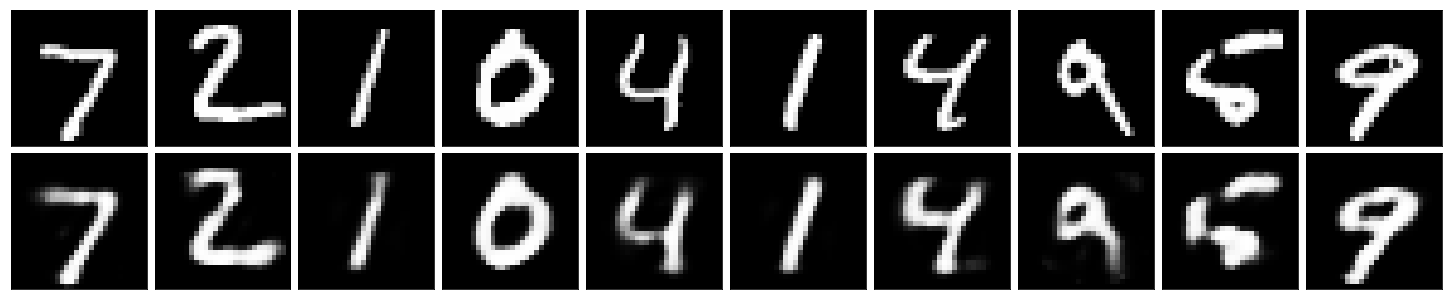

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [23]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.